DataFrame after one-hot encoding and splitting:
X shape: (1338, 8)
y shape: (1338,)
Predictions on the test set made successfully.
First 5 predictions:
[ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]
Root Mean Squared Error (RMSE): 5796.28
R-squared (R2) Score: 0.78


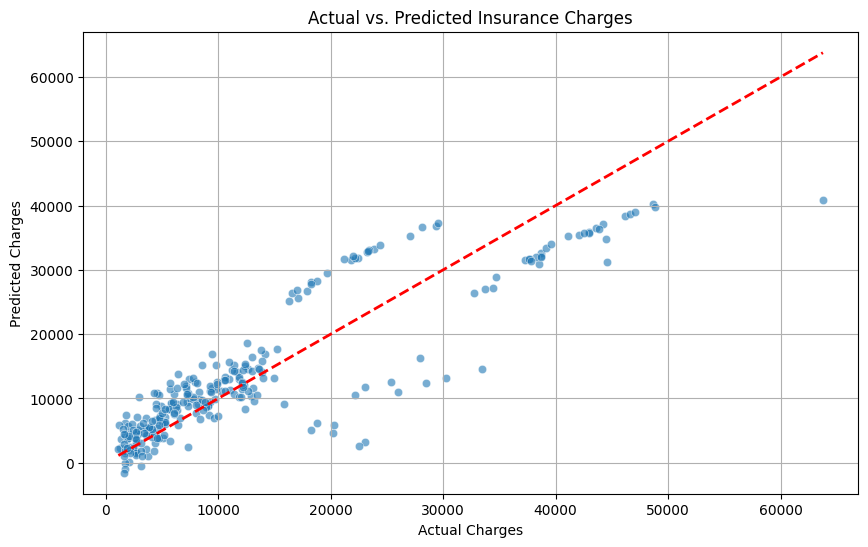

Plot of Actual vs. Predicted Insurance Charges displayed.
First 10 Actual vs. Predicted Values:
           Actual     Predicted
764    9095.06825   8969.550274
887    5272.17580   7068.747443
890   29330.98315  36858.410912
1293   9301.89355   9454.678501
259   33750.29180  26973.173457
1312   4536.25900  10864.113164
899    2117.33885    170.280841
752   14210.53595  16903.450287
1286   3732.62510   1092.430936
707   10264.44210  11218.343184


In [2]:
#Multiple Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/insurance.csv')
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

X = df.drop('charges', axis=1)
y = df['charges']
print("DataFrame after one-hot encoding and splitting:")
print("X shape:", X.shape)
print("y shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions on the test set made successfully.")
print("First 5 predictions:")
print(y_pred[:5])

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.grid(True)
plt.show()

print("Plot of Actual vs. Predicted Insurance Charges displayed.")
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("First 10 Actual vs. Predicted Values:")
print(comparison_df.head(10))


X shape: (1338, 8)
y shape: (1338,)
Best Alpha: 100.0
RMSE: 5835.80
R2 Score: 0.78


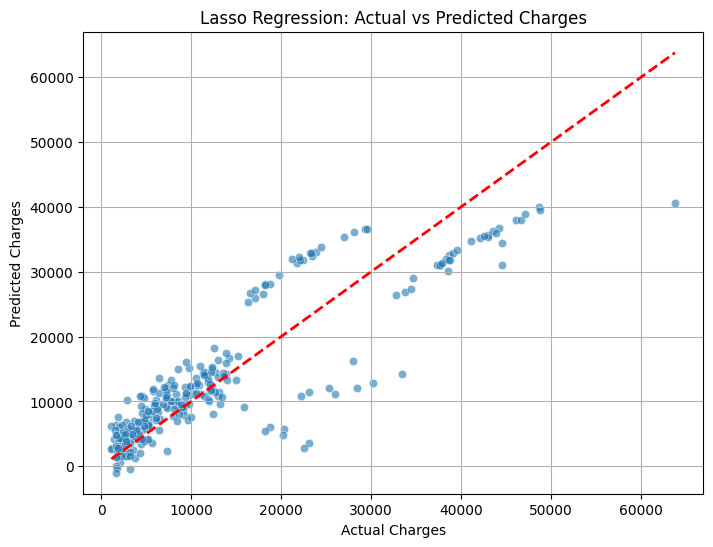

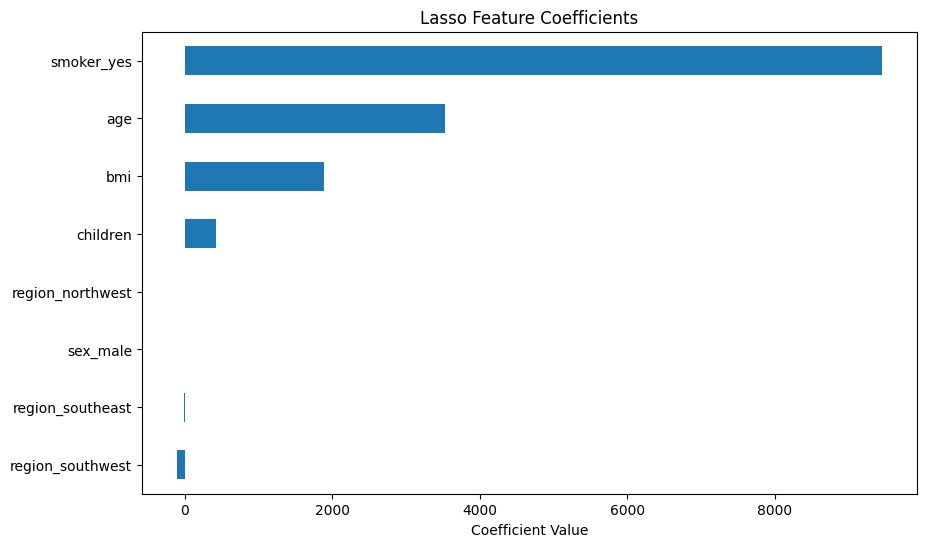


First 5 Actual vs Predicted:
        Actual     Predicted
0   9095.06825   8646.080987
1   5272.17580   7207.281459
2  29330.98315  36639.037035
3   9301.89355   9425.195895
4  33750.29180  26928.488753


In [3]:
#Lasso Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/insurance.csv')


df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

X = df.drop('charges', axis=1)
y = df['charges']

print("X shape:", X.shape)
print("y shape:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso = LassoCV(
    alphas=np.logspace(-3, 2, 50),
    cv=5,
    random_state=42
)

lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

print("Best Alpha:", lasso.alpha_)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', lw=2
)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Lasso Regression: Actual vs Predicted Charges")
plt.grid(True)
plt.show()


lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_coef = lasso_coef.sort_values()

plt.figure(figsize=(10, 6))
lasso_coef.plot(kind='barh')
plt.title("Lasso Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.show()


comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print("\nFirst 5 Actual vs Predicted:")
print(comparison_df.head(5))


X shape: (1338, 8)
y shape: (1338,)
Best Alpha (Ridge): 8.286427728546842
RMSE: 5802.53
R2 Score: 0.78


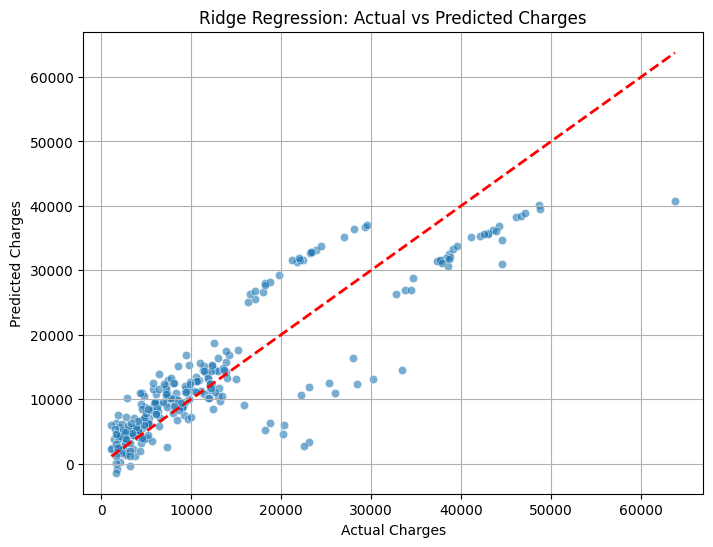

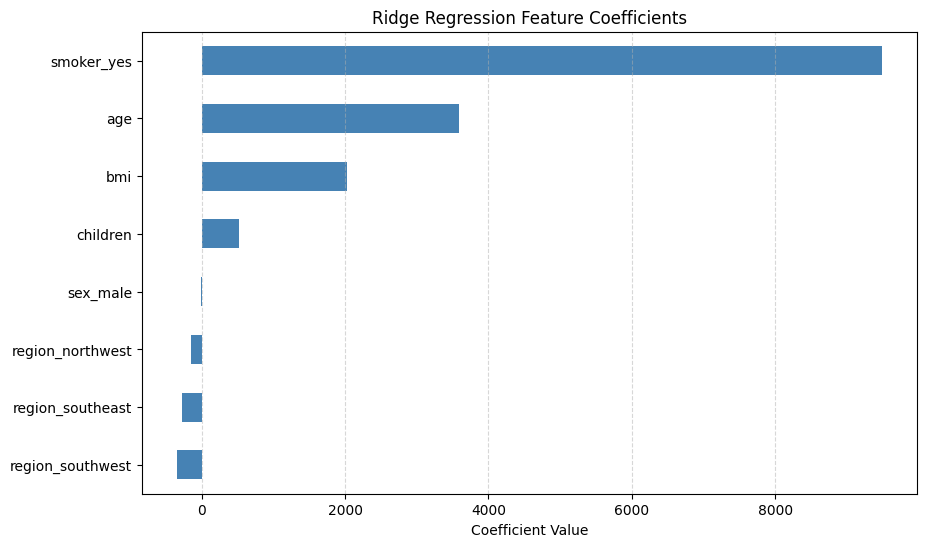


First 10 Actual vs Predicted:
        Actual     Predicted
0   9095.06825   8989.304297
1   5272.17580   7106.582310
2  29330.98315  36657.509225
3   9301.89355   9490.595378
4  33750.29180  26865.848853
5   4536.25900  10889.904777
6   2117.33885    263.160755
7  14210.53595  16873.053602
8   3732.62510   1169.970190
9  10264.44210  11240.433091


In [4]:
#Ridge Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/insurance.csv')


df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

X = df.drop('charges', axis=1)
y = df['charges']

print("X shape:", X.shape)
print("y shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(
    alphas=np.logspace(-3, 3, 50),
    cv=5
)

ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

print("Best Alpha (Ridge):", ridge.alpha_)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', lw=2
)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Ridge Regression: Actual vs Predicted Charges")
plt.grid(True)
plt.show()

ridge_coef = pd.Series(ridge.coef_, index=X.columns)
ridge_coef = ridge_coef.sort_values()

plt.figure(figsize=(10, 6))
ridge_coef.plot(kind='barh', color='steelblue')
plt.title("Ridge Regression Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print("\nFirst 10 Actual vs Predicted:")
print(comparison_df.head(10))
